In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [3]:
df = pd.read_excel("nama_file_excel.xlsx")
nltk.download("stopwords")
nltk.download("punkt")

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

keywordLLM = ["large language model", "large language models"]
keywordRS = ["recommender system", "recommender systems", "recommendation system", "recommendation systems"]

def clean_text(text = "default"):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # # Stem the words
    # words = [stemmer.stem(word) for word in words]
    # Join the words back into a single string
    return " ".join(words)

def check_valid_paper(text = "default"):
    isFindLLM = False;
    isFindRS = False;
    for i in keywordLLM:
      if i in text:
        isFindLLM = True;
        break;
    for i in keywordRS:
      if i in text:
        isFindRS = True;
        break;
    return [isFindLLM, isFindRS]

# df.head()
# df = df[["Year", "Title", "Abstract", "Keywords"]]
# remove blank rows
# df.dropna(subset=['Year'], inplace=True)
# df.dropna(subset=['Title'], inplace=True)
# df.dropna(subset=['Abstract'], inplace=True)
# df.dropna(subset=['Keywords'], inplace=True)

# Clean and normalize the text data
df["Manual Tags"] = df["Manual Tags"].astype(str).apply(clean_text)
df["Abstract Note"] = df["Abstract Note"].astype(str).apply(clean_text)
df["Title"] = df["Title"].astype(str).apply(clean_text)

removeIndex = {
    "count": {
        "full_query": [],
        "llm_only": [],
        "rs_only": [],
    },
    "abstract": [],
    "keywords": [],
    "title": [],
}
validIndex = {
    "full_query": {
        "count": [],
        "abstract": [],
        "keywords": [],
        "title": [],
    },
    "llm_only": {
        "count": [],
        "abstract": [],
        "keywords": [],
        "title": [],
    },
    "rs_only": {
        "count": [],
        "abstract": [],
        "keywords": [],
        "title": [],
    }
}
for i in df.itertuples():
  isFindAbstract = check_valid_paper(i._11)
  isFindKeywords = check_valid_paper(i._40)
  isFindTitle = check_valid_paper(i.Title)

  isValidIndexFullQuery = False
  isValidIndexLLMOnly = False
  isValidIndexRSOnly = False

  #Check abstract
  if (isFindAbstract[0] == False and isFindAbstract[1] == False):
    removeIndex["abstract"].append(i.Index)
  elif (isFindAbstract[0] == True and isFindAbstract[1] == False):
    validIndex["llm_only"].get("abstract").append(i.Index)
    isValidIndexLLMOnly = True
  elif (isFindAbstract[0] == False and isFindAbstract[1] == True):
    validIndex["rs_only"].get("abstract").append(i.Index)
    isValidIndexRSOnly = True
  else:
    validIndex["full_query"].get("abstract").append(i.Index)
    isValidIndexFullQuery = True

  #Check title
  if (isFindTitle[0] == False and isFindTitle[1] == False):
    removeIndex["title"].append(i.Index)
  elif (isFindTitle[0] == True and isFindTitle[1] == False):
    validIndex["llm_only"].get("title").append(i.Index)
    isValidIndexLLMOnly = True
  elif (isFindTitle[0] == False and isFindTitle[1] == True):
    validIndex["rs_only"].get("title").append(i.Index)
    isValidIndexRSOnly = True
  else:
    validIndex["full_query"].get("title").append(i.Index)
    isValidIndexFullQuery = True

  #Check keywords
  if (isFindKeywords[0] == False and isFindKeywords[1] == False):
    removeIndex["keywords"].append(i.Index)
  elif (isFindKeywords[0] == True and isFindKeywords[1] == False):
    validIndex["llm_only"].get("keywords").append(i.Index)
    isValidIndexLLMOnly = True
  elif (isFindKeywords[0] == False and isFindKeywords[1] == True):
    validIndex["rs_only"].get("keywords").append(i.Index)
    isValidIndexRSOnly = True
  else:
    validIndex["full_query"].get("keywords").append(i.Index)
    isValidIndexFullQuery = True

  if (isValidIndexFullQuery == True):
    validIndex["full_query"].get("count").append(i.Index)
  else:
    removeIndex["count"].get("full_query").append(i.Index)
  if (isValidIndexLLMOnly == True):
    validIndex["llm_only"].get("count").append(i.Index)
  else:
    removeIndex["count"].get("llm_only").append(i.Index)
  if (isValidIndexRSOnly == True):
    validIndex["rs_only"].get("count").append(i.Index)
  else:
    removeIndex["count"].get("rs_only").append(i.Index)

print("Abstrak")
print("Invalid Paper", str(len(removeIndex["abstract"])))
print("Valid Paper Full Query", str(len(validIndex["full_query"].get("abstract"))))
print("Valid Paper LLM Only", str(len(validIndex["llm_only"].get("abstract"))))
print("Valid Paper RS Only", str(len(validIndex["rs_only"].get("abstract"))))
print("")

print("Title")
print("Invalid Paper", str(len(removeIndex["title"])))
print("Valid Paper Full Query", str(len(validIndex["full_query"].get("title"))))
print("Valid Paper LLM Only", str(len(validIndex["llm_only"].get("title"))))
print("Valid Paper RS Only", str(len(validIndex["rs_only"].get("title"))))
print("")

print("Keywords")
print("Invalid Paper", str(len(removeIndex["keywords"])))
print("Valid Paper Full Query", str(len(validIndex["full_query"].get("keywords"))))
print("Valid Paper LLM Only", str(len(validIndex["llm_only"].get("keywords"))))
print("Valid Paper RS Only", str(len(validIndex["rs_only"].get("keywords"))))
print("")

print("Overall")
print("Invalid Paper Full Query", str(len(removeIndex["count"].get("full_query"))))
print("Valid Paper Full Query", str(len(validIndex["full_query"].get("count"))))
print("Invalid Paper LLM Only", str(len(removeIndex["count"].get("llm_only"))))
print("Valid Paper LLM Only", str(len(validIndex["llm_only"].get("count"))))
print("Invalid Paper RS Only", str(len(removeIndex["count"].get("rs_only"))))
print("Valid Paper RS Only", str(len(validIndex["rs_only"].get("count"))))
print("")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Abstrak
Invalid Paper 237
Valid Paper Full Query 57
Valid Paper LLM Only 64
Valid Paper RS Only 59

Title
Invalid Paper 336
Valid Paper Full Query 5
Valid Paper LLM Only 43
Valid Paper RS Only 33

Keywords
Invalid Paper 300
Valid Paper Full Query 31
Valid Paper LLM Only 36
Valid Paper RS Only 50

Overall
Invalid Paper Full Query 349
Valid Paper Full Query 68
Invalid Paper LLM Only 316
Valid Paper LLM Only 101
Invalid Paper RS Only 319
Valid Paper RS Only 98



In [ ]:
df.head(1)

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,X7MGH3YL,conferencePaper,2023,"Rajala, Jaakko; Hukkanen, Jenni; Hartikainen, ...",textbackslashcall kirantextbackslash chatgpt t...,Proceedings of the 26th International Academic...,9798400708749,NaN,10.1145/3616961.3616974,https://doi.org/10.1145/3616961.3616974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def find_common_elements(arr1, arr2, arr3):
    # Menggunakan set intersection (&) untuk menemukan nilai yang sama
    common_elements = set(arr1) & set(arr2) & set(arr3)
    return list(common_elements)

def find_common_elements_2(arr1, arr2):
    # Menggunakan set intersection (&) untuk menemukan nilai yang sama
    common_elements = set(arr1) & set(arr2)
    return list(common_elements)
# Contoh array
# array1 = [1, 2, 3, 4, 5]
# array2 = [3, 4, 5, 6, 7]
# array3 = [5, 6, 7, 8, 9]

common_values = find_common_elements_2(
    validIndex["full_query"].get("title"),
    validIndex["full_query"].get("keywords"))
print("Nilai yang sama dari kedua array adalah:", common_values)
# print("Nilai yang sama dari ketiga array adalah:", common_values)

Nilai yang sama dari kedua array adalah: [133, 326, 239]


In [ ]:
Nilai yang sama dari ketiga array adalah: [133, 326, 239]
Nilai yang sama dari kedua array adalah: [133, 326, 103, 237, 239] // Abstract Title
Nilai yang sama dari kedua array adalah: [256, 382, 133, 399, 149, 288, 303, 313, 314, 188, 198, 326, 203, 218, 346, 239, 241, 250, 254, 255] // Abstract Keywords
Nilai yang sama dari kedua array adalah: [133, 326, 239] // Title Keywords

In [8]:
array = [256, 382, 133, 399, 149, 288, 303, 313, 314, 188, 198, 326, 203, 218, 346, 239, 241, 250, 254, 255]
jumlah_indeks = len(array)
print("Jumlah indeks dalam array tersebut adalah:", jumlah_indeks)

Jumlah indeks dalam array tersebut adalah: 20


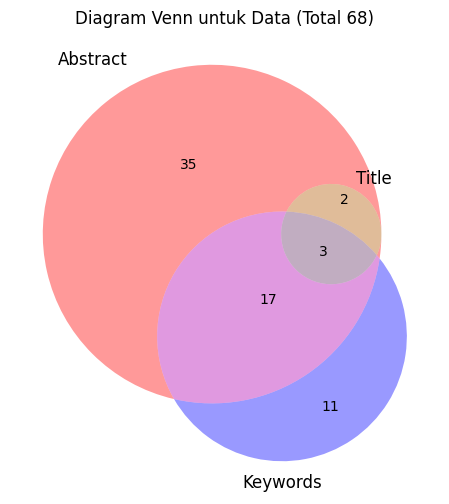

In [14]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

# Total jumlah data
total = 68

# Data
abstract_only = 57
title_only = 5
keywords_only = 31
abstract_and_title = 5
abstract_and_keywords = 20
title_and_keywords = 3
abstract_and_title_and_keywords = 3

# Menghitung nilai-nilai yang belum digunakan
abstract_only = total - (abstract_and_title + abstract_and_keywords + abstract_and_title_and_keywords)
title_only = total - (abstract_and_title + title_and_keywords + abstract_and_title_and_keywords)
keywords_only = total - (abstract_and_keywords + title_and_keywords + abstract_and_title_and_keywords)

# Membuat diagram Venn
venn_labels = ('Abstract', 'Title', 'Keywords')
venn_values = {
    '100': 35,
    '010': 0,
    '001': 11,
    '110': 2,
    '101': 17,
    '011': 0,
    '111': 3
}

plt.figure(figsize=(8, 6))
venn = venn3(subsets=venn_values, set_labels=venn_labels)
plt.title("Diagram Venn untuk Data (Total 68)")
plt.show()